In [264]:
# import the data, which is extracted 1st and 2nd formants from frames of speech audio signal
import numpy as np
data = np.genfromtxt('data.csv',delimiter=',')
data = data.transpose()
data.shape

(5067, 2)

In [265]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 6)
kmeans.fit(data)
y_means = kmeans.predict(data)

# we can try to plot a histogram of the data

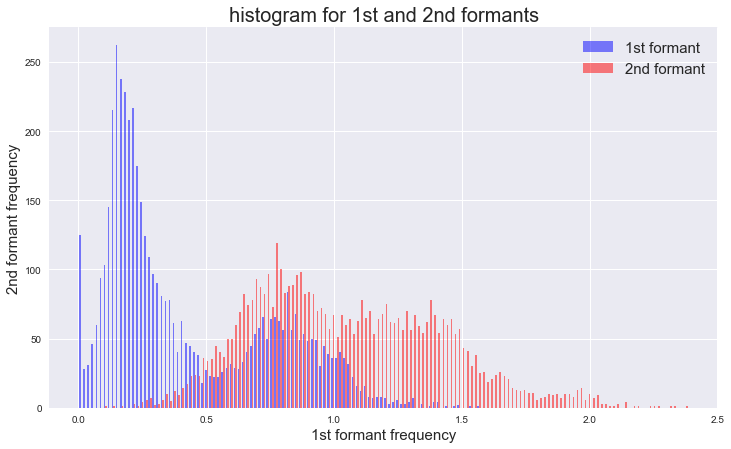

In [266]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.xlabel('1st formant frequency', fontsize = 15)
plt.ylabel('2nd formant frequency', fontsize = 15)
plt.title("histogram for 1st and 2nd formants", fontsize = 20)
plt.hist(data,bins = 150, color = ('b', 'r'), label = ("1st formant", "2nd formant"), 
         alpha = .5)
plt.legend(fontsize = 15)
plt.show()

# we can also try to see correlation between formant 1 and formant 2 and plot it

In [267]:
data_t = data.transpose()
corrcoef = np.corrcoef(data_t)
corrcoef

array([[ 1.        ,  0.76419911],
       [ 0.76419911,  1.        ]])

# using k-mean algorithm to cluster the data into four clusters
# which correspond to four vowels 

Text(0.5,1,'1st & 2nd formant clustering')

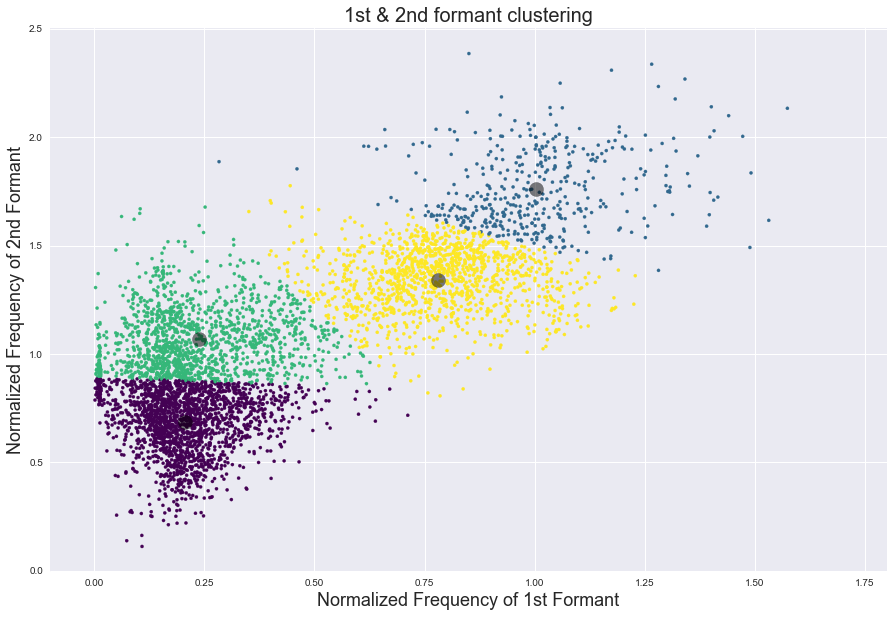

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize = (15, 10))
plt.scatter(data[:,0],data[:,1], c= y_means, s = 10, cmap = 'viridis' )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s = 200, alpha = 0.5)
plt.xlim(-0.1,1.8)
plt.xlabel('Normalized Frequency of 1st Formant', fontsize = 18)
plt.ylabel('Normalized Frequency of 2nd Formant', fontsize = 18)
plt.title('1st & 2nd formant clustering', fontsize = 20)

In [269]:
y_means.shape

(5067,)

In [270]:
cluster_centers = kmeans.fit(data).cluster_centers_
cluster_centers

array([[ 0.20670612,  0.68543255],
       [ 1.00418676,  1.76208881],
       [ 0.23797928,  1.06826027],
       [ 0.78067434,  1.34293523]])

In [283]:
# now we can use mixture of gaussians to fit the four vowel areas
import sklearn.mixture as mixture
from matplotlib.colors import LogNorm
clustering = mixture.GaussianMixture(n_components = 4, covariance_type = "full")
clustering.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [284]:
# plot the clusters
x = np.linspace(0.0, 1.5)
y = np.linspace(0.0, 2.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clustering.score_samples(XX)
Z = Z.reshape(X.shape)

C:\Users\Leo Du\Anaconda3\lib\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
C:\Users\Leo Du\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)


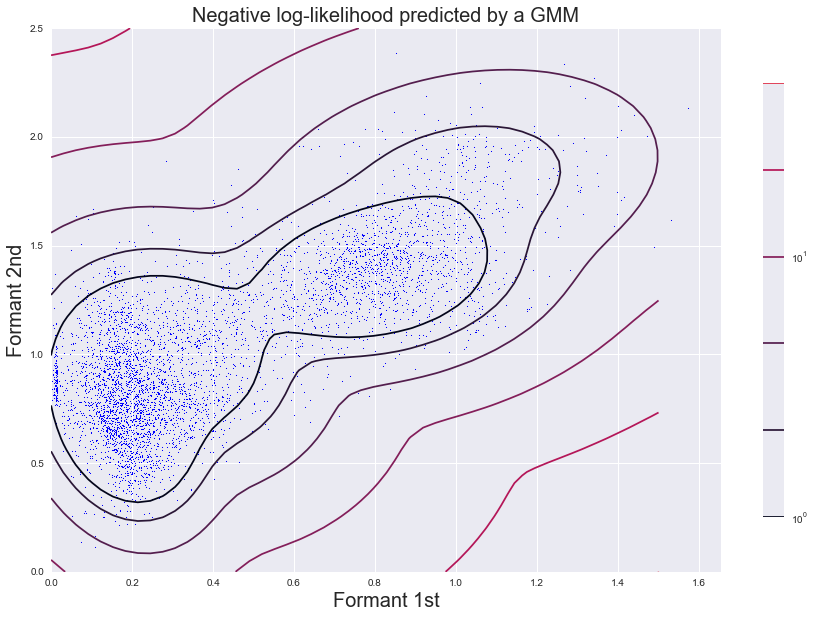

In [285]:
# plot the Mixture of Gaussian model clustering of the formants
plt.figure(figsize = (15,10))
CS = plt.contour(X, Y, Z, norm = LogNorm(vmin = 1, vmax = 1000),
                 levels = np.logspace(0, 3, 10), figsize = (10,10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(data[:, 0], data[:, 1], .8, c = 'b', marker = '*')
plt.title('Negative log-likelihood predicted by a GMM', fontsize = 20)
plt.axis('tight')
plt.xlabel('Formant 1st', fontsize = 20)
plt.ylabel('Formant 2nd', fontsize = 20)
plt.show()